# Phishing URL Detection

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

## 1. Loading Data:



In [ ]:
#Loading data into dataframe

data = pd.read_csv("5.urldata.csv")
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Shape of dataframe

data.shape

(10000, 18)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [ ]:
# nunique value in columns

data.nunique()

Domain           3553
Have_IP             2
Have_At             2
URL_Length          2
URL_Depth          18
Redirection         2
https_Domain        2
TinyURL             2
Prefix/Suffix       2
DNS_Record          2
Web_Traffic         2
Domain_Age          2
Domain_End          2
iFrame              2
Mouse_Over          2
Right_Click         2
Web_Forwards        2
Label               2
dtype: int64

In [ ]:
#Dropping the Domain column
data = data.drop(['Domain'], axis = 1).copy()

In [ ]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,10000.0,0.0055,0.073961,0.0,0.0,0.0,0.0,1.0
Have_At,10000.0,0.0226,0.148632,0.0,0.0,0.0,0.0,1.0
URL_Length,10000.0,0.7734,0.418653,0.0,1.0,1.0,1.0,1.0
URL_Depth,10000.0,3.0720,2.128631,0.0,2.0,3.0,4.0,20.0
Redirection,10000.0,0.0135,0.115408,0.0,0.0,0.0,0.0,1.0
https_Domain,10000.0,0.0002,0.014141,0.0,0.0,0.0,0.0,1.0
TinyURL,10000.0,0.0903,0.286625,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,10000.0,0.0932,0.290727,0.0,0.0,0.0,0.0,1.0
DNS_Record,10000.0,0.1008,0.301079,0.0,0.0,0.0,0.0,1.0
Web_Traffic,10000.0,0.8457,0.361254,0.0,1.0,1.0,1.0,1.0


data_set.append(9 OBSERVATIONS:
1. There are 1000 instances and 17 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Exploration data analysis of visualization and training a model by given attributes:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

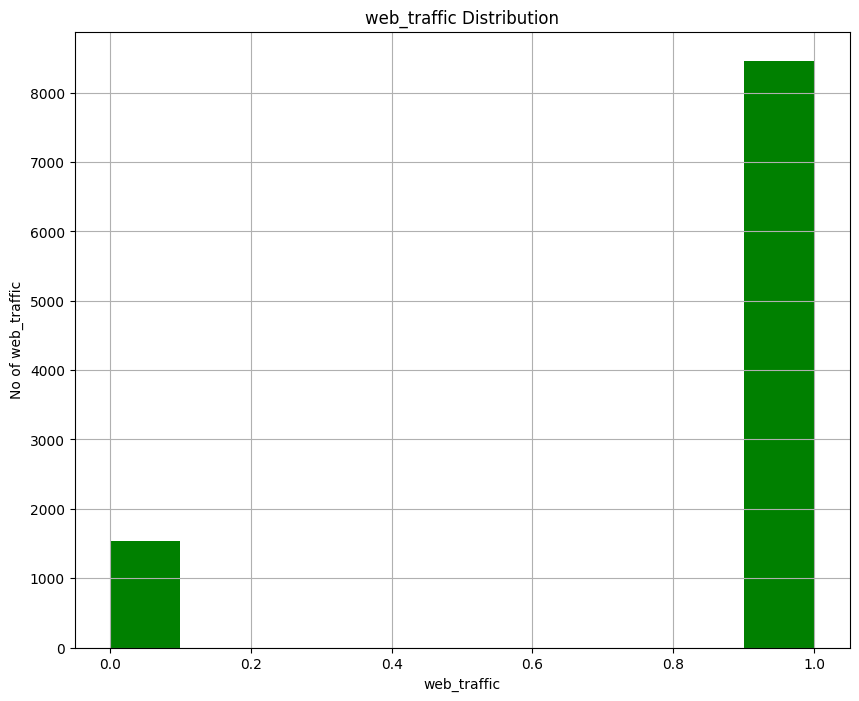

In [ ]:
#Histogram plot of Age distribution
data["Web_Traffic"].hist(figsize=(10,8), color="green")
plt.title("web_traffic Distribution")
plt.xlabel("web_traffic")
plt.ylabel("No of web_traffic")
plt.show()


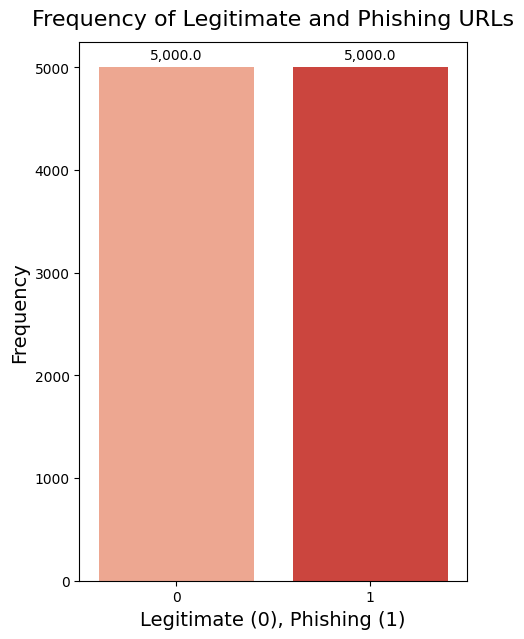

In [ ]:
plt.figure(figsize = (5, 7))
bar = sns.countplot(x=data["Label"],
              data=data,
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

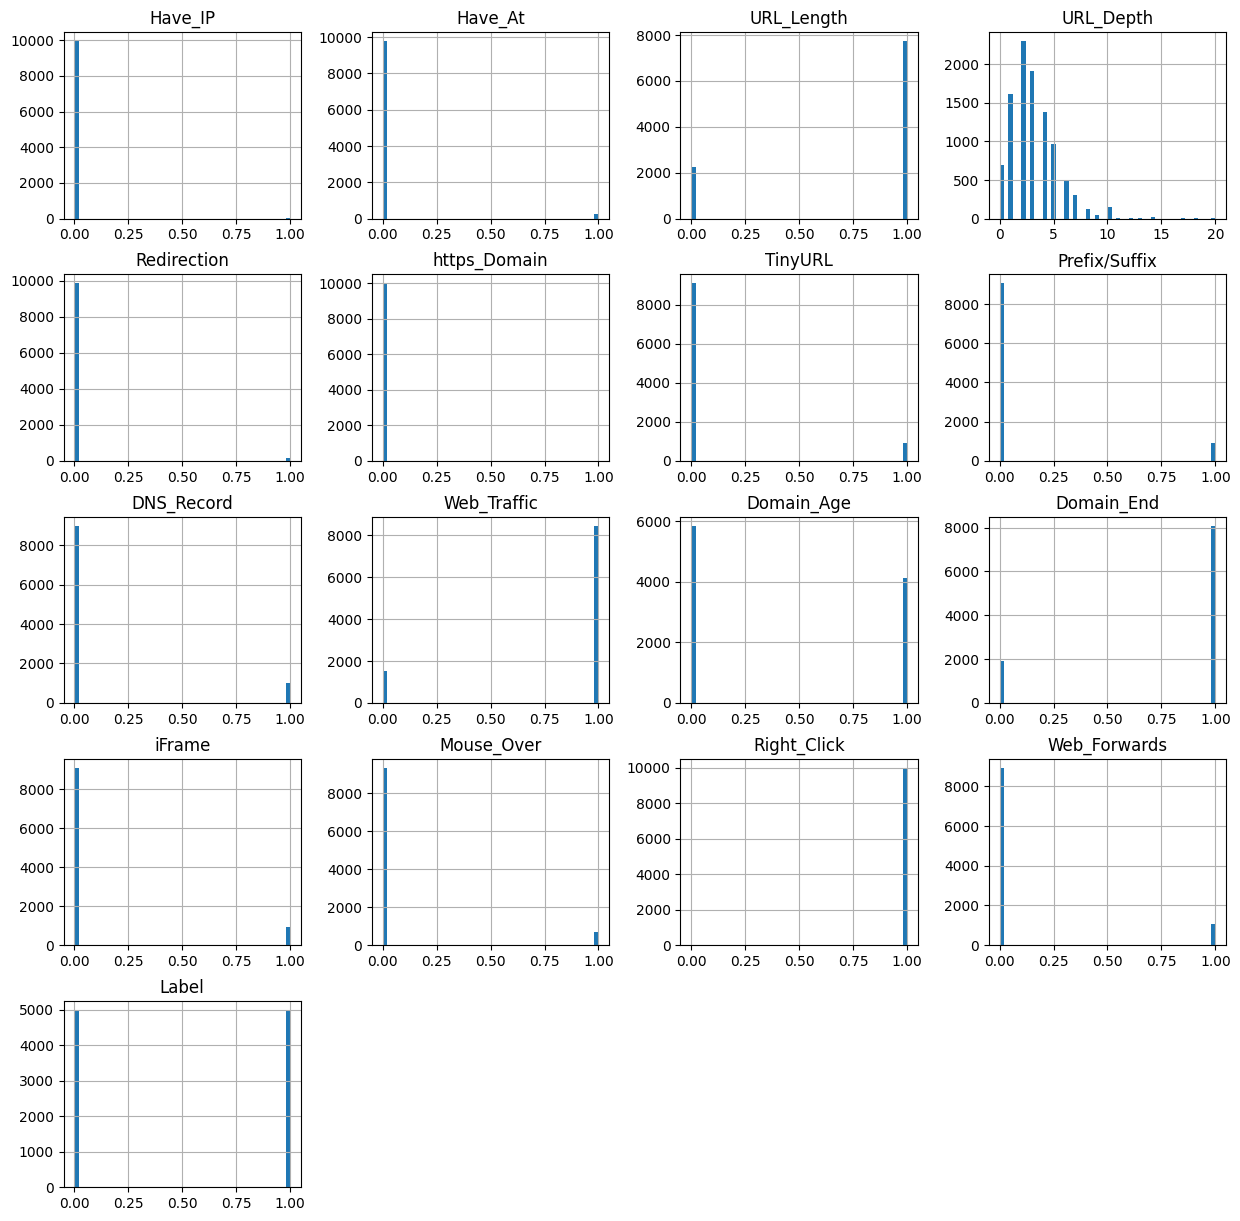

In [ ]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
#Correlation heatmap
out = data.corr()

<Axes: >

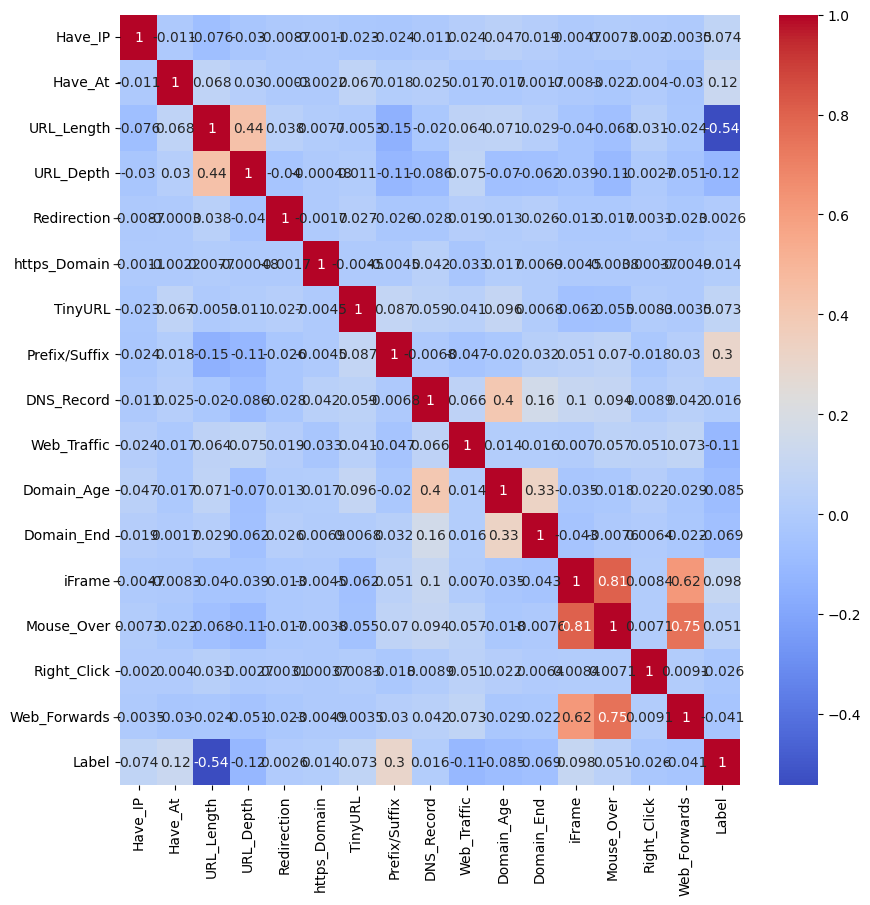

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(out, cmap = 'coolwarm', annot = True)

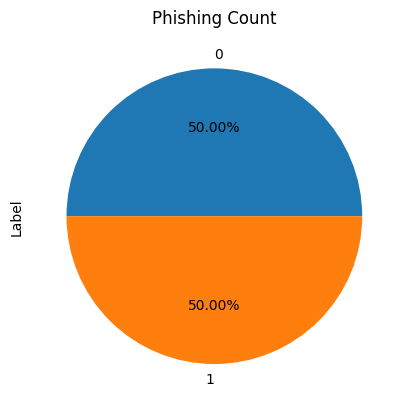

In [ ]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

1    38.67
0    11.33
Name: URL_Length, dtype: float64

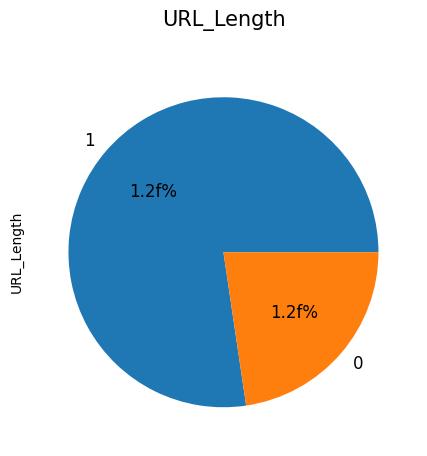

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'URL_Length')



0    49.72
1     0.27
Name: Have_IP, dtype: float64

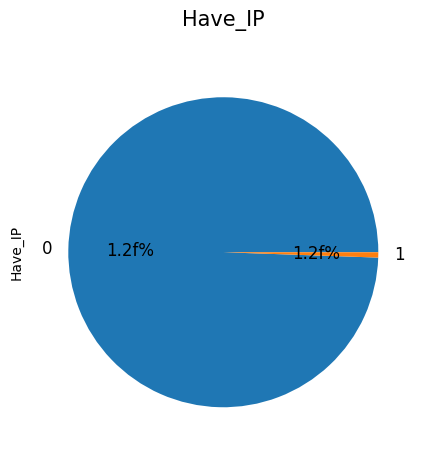

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Have_IP')

0    48.87
1     1.13
Name: Have_At, dtype: float64

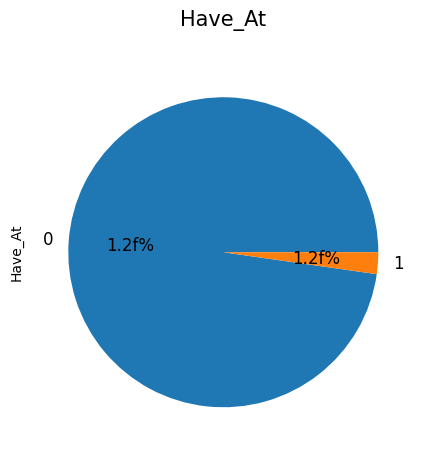

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Have_At')

2     11.49
3      9.54
1      8.04
4      6.92
5      4.81
0      3.44
6      2.43
7      1.53
10     0.73
8      0.64
9      0.24
14     0.08
11     0.04
12     0.02
13     0.01
18     0.00
17     0.00
20     0.00
Name: URL_Depth, dtype: float64

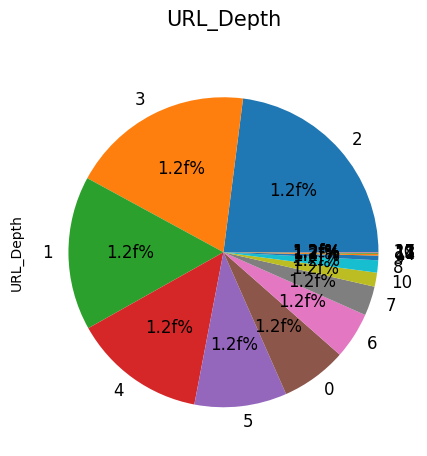

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'URL_Depth')

0    49.32
1     0.68
Name: Redirection, dtype: float64

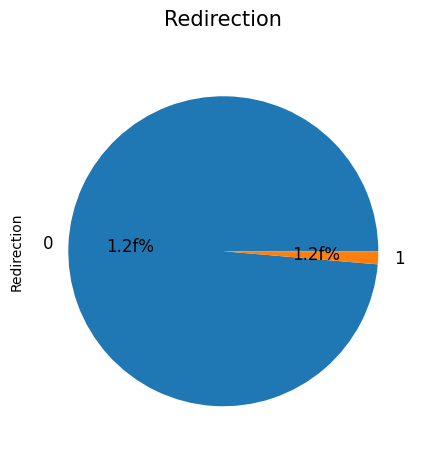

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Redirection')

0    45.34
1     4.66
Name: Prefix/Suffix, dtype: float64

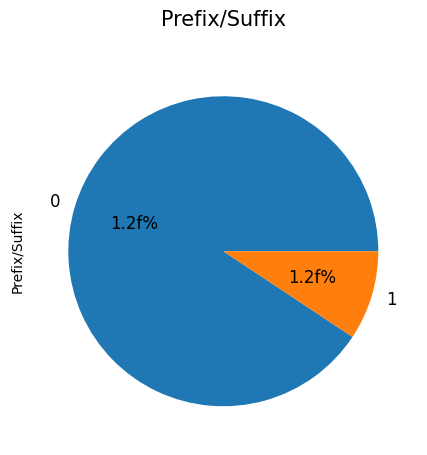

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Prefix/Suffix')

0    45.34
1     4.66
Name: Prefix/Suffix, dtype: float64

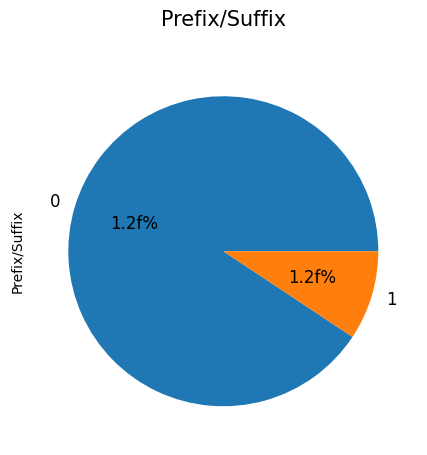

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Prefix/Suffix')

0    45.48
1     4.52
Name: TinyURL, dtype: float64

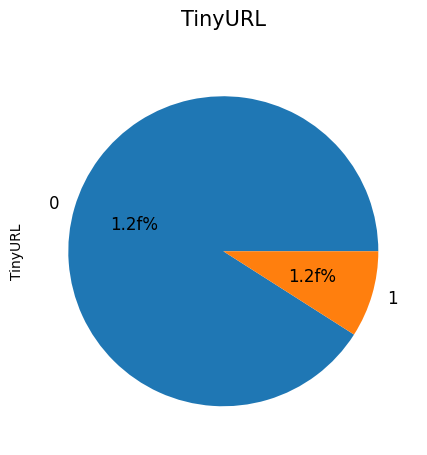

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'TinyURL')

0    45.46
1     4.54
Name: iFrame, dtype: float64

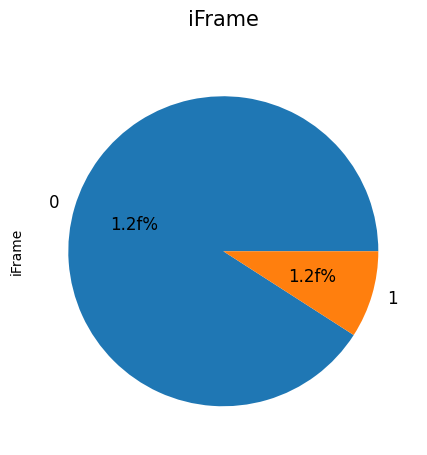

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'iFrame')

1    49.96
0     0.03
Name: Right_Click, dtype: float64

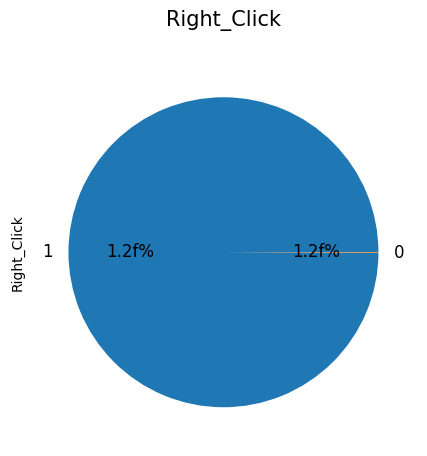

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Right_Click')

0    44.74
1     5.26
Name: Web_Forwards, dtype: float64

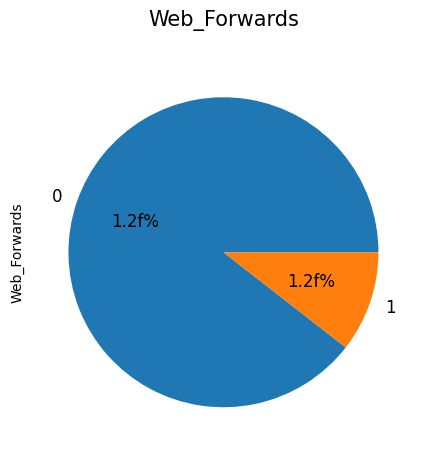

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Web_Forwards')

0    46.67
1     3.33
Name: Mouse_Over, dtype: float64

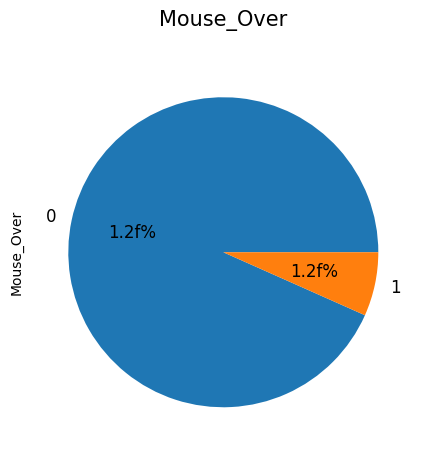

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Mouse_Over')

1    40.49
0     9.50
Name: Domain_End, dtype: float64

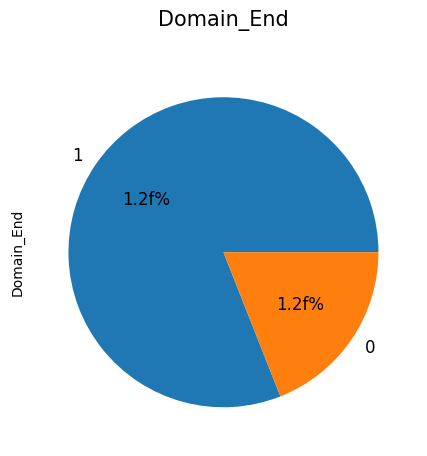

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Domain_End')

0    29.32
1    20.68
Name: Domain_Age, dtype: float64

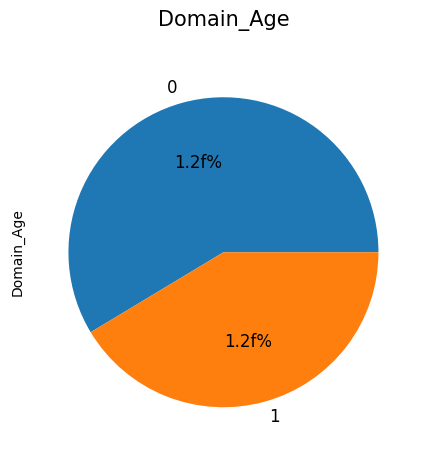

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Domain_Age')

1    42.28
0     7.72
Name: Web_Traffic, dtype: float64

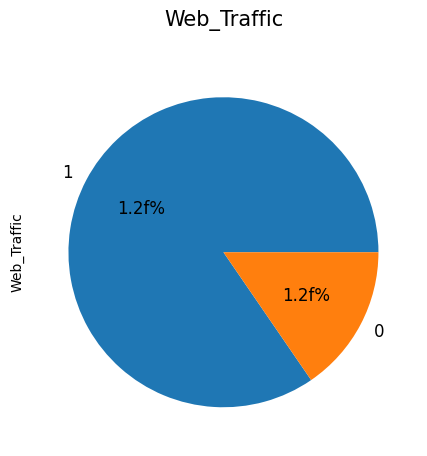

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'Web_Traffic')

0    44.96
1     5.04
Name: DNS_Record, dtype: float64

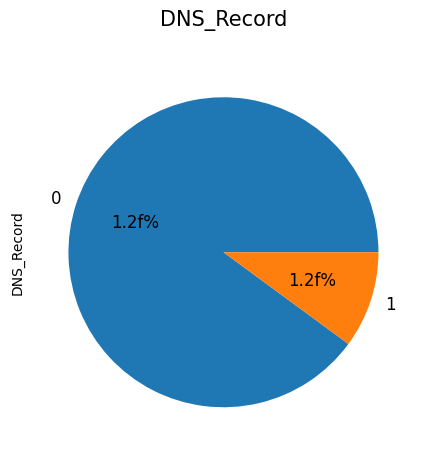

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'DNS_Record')

0    49.99
1     0.01
Name: https_Domain, dtype: float64

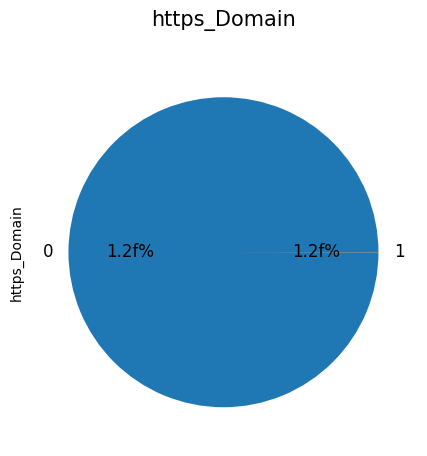

In [ ]:
def PropByVar(data, variable):
    dataframe_pie = data[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(5,10), autopct='1.2f%%', fontsize = 12)
    ax.set_title(variable + '\n', fontsize = 15)
    return np.round(dataframe_pie/data.shape[0]*50,2)

PropByVar(data, 'https_Domain')

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [ ]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Label"],axis =1)
y = data["Label"]

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 16), (8000,), (2000, 16), (2000,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [ ]:
# Linear regression model
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.807
Logistic Regression : Accuracy on test Data: 0.792

Logistic Regression : f1_score on training Data: 0.776
Logistic Regression : f1_score on test Data: 0.752

Logistic Regression : Recall on training Data: 0.666
Logistic Regression : Recall on test Data: 0.638

Logistic Regression : precision on training Data: 0.929
Logistic Regression : precision on test Data: 0.917


              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1012
           1       0.92      0.64      0.75       988

    accuracy                           0.79      2000
   macro avg       0.82      0.79      0.79      2000
weighted avg       0.82      0.79      0.79      2000

[[955  57]
 [358 630]]
Accuracy:  0.7925
Misclassification Rate:  0.2075
Recall:  0.6376518218623481
Specificity:  0.9436758893280632
Precision:  0.9170305676855895


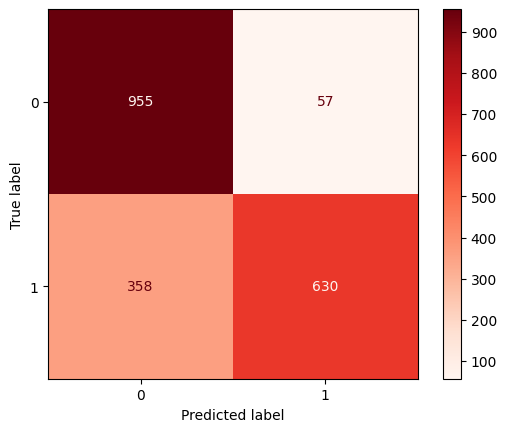

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))
print(confusion_matrix(y_test, y_test_log))
cm = confusion_matrix(y_test, y_test_log)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_log).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the logistic regression model
perm_importance = permutation_importance(log, X_test, y_test)

# Get the feature names and their corresponding importance scores
feature_names = X_test.columns
importances = perm_importance['importances_mean']

# Sort features by importance
sorted_features = sorted(zip(feature_names, importances), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 most important features
for feature, importance in sorted_features[:10]:
    print(f"Feature: {feature} | Importance: {importance:.3f}")


Feature: URL_Length | Importance: 0.201
Feature: Prefix/Suffix | Importance: 0.062
Feature: Web_Forwards | Importance: 0.026
Feature: iFrame | Importance: 0.026
Feature: Have_At | Importance: 0.017
Feature: Web_Traffic | Importance: 0.011
Feature: URL_Depth | Importance: 0.009
Feature: Have_IP | Importance: 0.006
Feature: Domain_Age | Importance: -0.006
Feature: DNS_Record | Importance: 0.003


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [ ]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

Logistic Regression : Accuracy on training Data: 0.807
Logistic Regression : Accuracy on test Data: 0.792



## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

# New Section

In [ ]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [ ]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.787
K-Nearest Neighbors : Accuracy on test Data: 0.757

K-Nearest Neighbors : f1_score on training Data: 0.801
K-Nearest Neighbors : f1_score on test Data: 0.766

K-Nearest Neighborsn : Recall on training Data: 0.856
Logistic Regression : Recall on test Data: 0.803

K-Nearest Neighbors : precision on training Data: 0.753
K-Nearest Neighbors : precision on test Data: 0.732


              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1012
           1       0.73      0.80      0.77       988

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1012
           1       0.73      0.80      0.77       988

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

[[722 290]
 [195 793]]
Accuracy:  0.7575
Misclassification Rate:  0.2425
Recall:  0.8026315789473685
Specificity:  0.7134387351778656
Precision:  0.7322253000923361


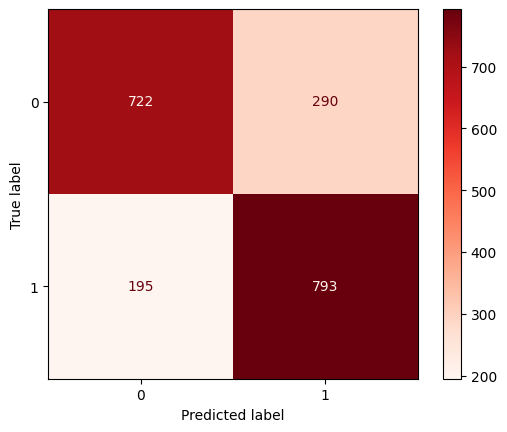

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))
print(confusion_matrix(y_test, y_test_knn))
cm = confusion_matrix(y_test, y_test_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_knn).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

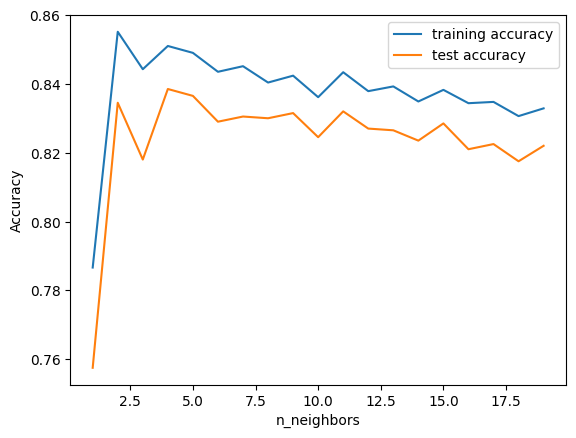

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [ ]:
# Support Vector Classifier model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [ ]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.833
Support Vector Machine : Accuracy on test Data: 0.830

Support Vector Machine : f1_score on training Data: 0.807
Support Vector Machine : f1_score on test Data: 0.797

Support Vector Machine : Recall on training Data: 0.694
Support Vector Machine : Recall on test Data: 0.677

Support Vector Machine : precision on training Data: 0.963
Support Vector Machine : precision on test Data: 0.968


              precision    recall  f1-score   support

           0       0.76      0.98      0.85      1012
           1       0.97      0.68      0.80       988

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.82      2000
weighted avg       0.86      0.83      0.83      2000

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      1012
           1       0.97      0.68      0.80       988

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.82      2000
weighted avg       0.86      0.83      0.83      2000

[[990  22]
 [319 669]]
Accuracy:  0.8295
Misclassification Rate:  0.1705
Recall:  0.6771255060728745
Specificity:  0.9782608695652174
Precision:  0.9681620839363242


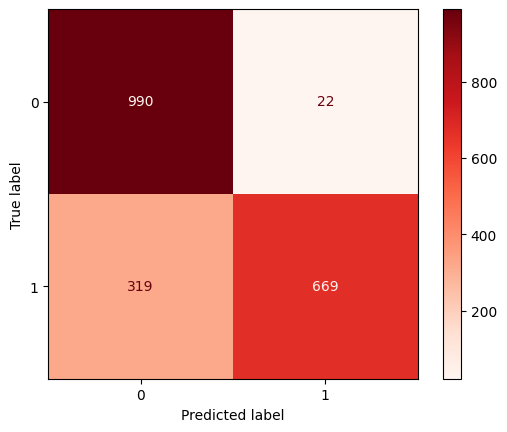

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))
print(confusion_matrix(y_test, y_test_svc))
cm = confusion_matrix(y_test, y_test_svc)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_svc).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [ ]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.793
Naive Bayes Classifier : Accuracy on test Data: 0.786

Naive Bayes Classifier : f1_score on training Data: 0.744
Naive Bayes Classifier : f1_score on test Data: 0.725

Naive Bayes Classifier : Recall on training Data: 0.600
Naive Bayes Classifier : Recall on test Data: 0.571

Naive Bayes Classifier : precision on training Data: 0.981
Naive Bayes Classifier : precision on test Data: 0.993


              precision    recall  f1-score   support

           0       0.70      1.00      0.82      1012
           1       0.99      0.57      0.72       988

    accuracy                           0.79      2000
   macro avg       0.85      0.78      0.77      2000
weighted avg       0.85      0.79      0.78      2000

[[1008    4]
 [ 424  564]]
Accuracy:  0.786
Misclassification Rate:  0.214
Recall:  0.5708502024291497
Specificity:  0.9960474308300395
Precision:  0.9929577464788732


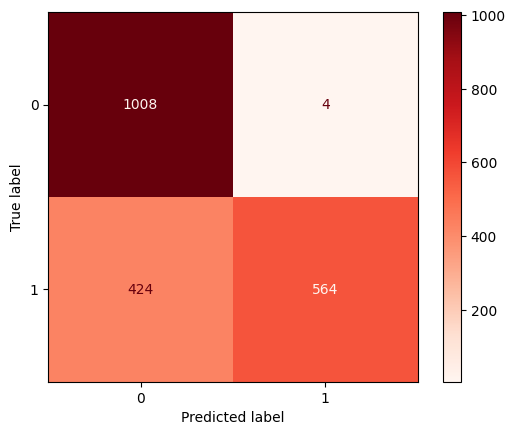

In [ ]:
#computing the classification report of the model


print(metrics.classification_report(y_test, y_test_nb))
print(confusion_matrix(y_test, y_test_nb))
cm = confusion_matrix(y_test, y_test_nb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_nb).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.869
Decision Tree : Accuracy on test Data: 0.858

Decision Tree : f1_score on training Data: 0.859
Decision Tree : f1_score on test Data: 0.840

Decision Tree : Recall on training Data: 0.795
Decision Tree : Recall on test Data: 0.755

Decision Tree : precision on training Data: 0.933
Decision Tree : precision on test Data: 0.947


              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1012
           1       0.95      0.76      0.84       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

[[970  42]
 [242 746]]
Accuracy:  0.858
Misclassification Rate:  0.142
Recall:  0.7550607287449392
Specificity:  0.958498023715415
Precision:  0.9467005076142132


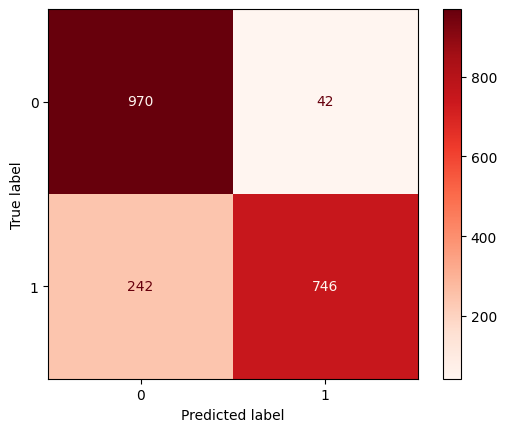

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

print(confusion_matrix(y_test, y_test_tree))
cm = confusion_matrix(y_test, y_test_tree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_tree).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))



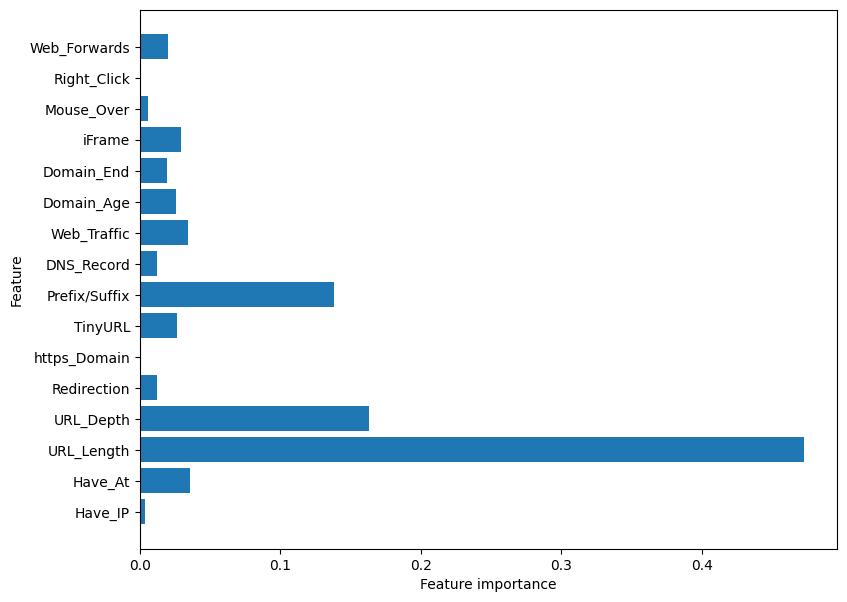

In [ ]:
#checking the feature improtance in the model
from sklearn.tree import DecisionTreeClassifier

# Fit the DecisionTreeClassifier model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Plot the feature importance bar chart
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


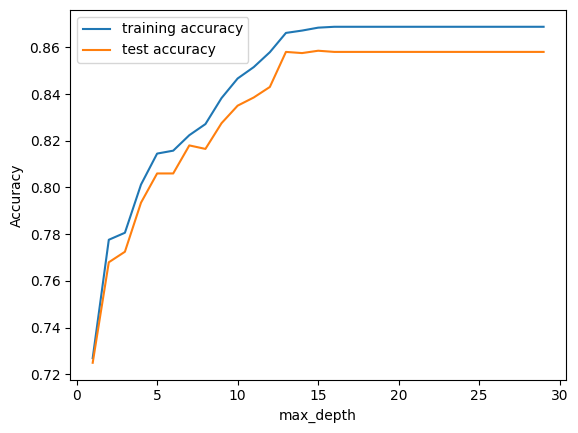

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))


#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.869
Random Forest : Accuracy on test Data: 0.860

Random Forest : f1_score on training Data: 0.859
Random Forest : f1_score on test Data: 0.843

Random Forest : Recall on training Data: 0.797
Random Forest : Recall on test Data: 0.760

Random Forest : precision on training Data: 0.932
Random Forest : precision on test Data: 0.947


              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1012
           1       0.95      0.76      0.84       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

[[969  43]
 [237 751]]
Accuracy:  0.86
Misclassification Rate:  0.14
Recall:  0.7601214574898786
Specificity:  0.9575098814229249
Precision:  0.9458438287153652


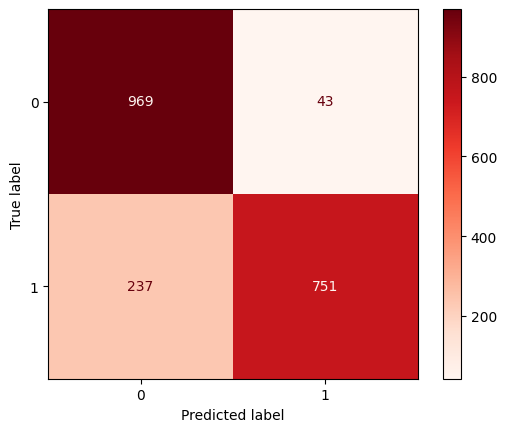

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))
#computing the classification report of the model


print(confusion_matrix(y_test, y_test_forest))
cm = confusion_matrix(y_test, y_test_forest)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = forest.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_forest).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

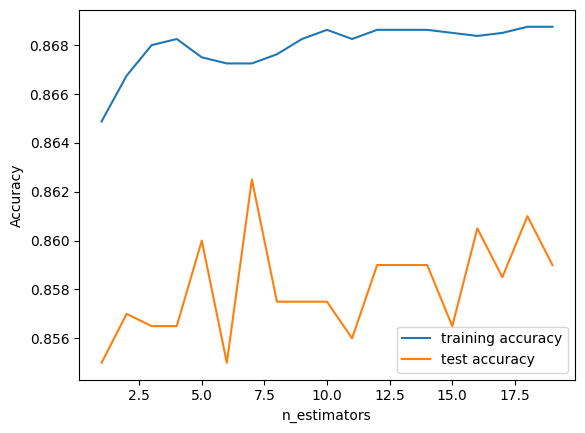

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.

In [ ]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.868
Gradient Boosting Classifier : Accuracy on test Data: 0.855

Gradient Boosting Classifier : f1_score on training Data: 0.856
Gradient Boosting Classifier : f1_score on test Data: 0.834

Gradient Boosting Classifier : Recall on training Data: 0.781
Gradient Boosting Classifier : Recall on test Data: 0.739

Gradient Boosting Classifier : precision on training Data: 0.948
Gradient Boosting Classifier : precision on test Data: 0.958


              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1012
           1       0.96      0.74      0.83       988

    accuracy                           0.85      2000
   macro avg       0.87      0.85      0.85      2000
weighted avg       0.87      0.85      0.85      2000

[[980  32]
 [258 730]]
Accuracy:  0.855
Misclassification Rate:  0.145
Recall:  0.7388663967611336
Specificity:  0.9683794466403162
Precision:  0.958005249343832


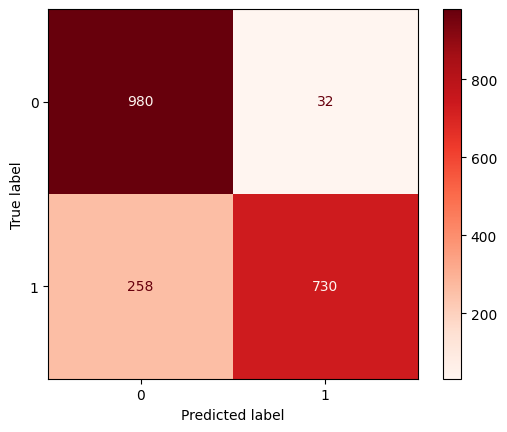

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))



print(confusion_matrix(y_test, y_test_gbc))
cm = confusion_matrix(y_test, y_test_gbc)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_gbc).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))


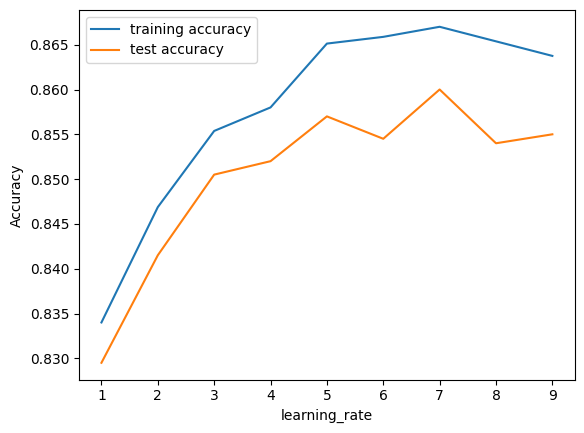

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend();

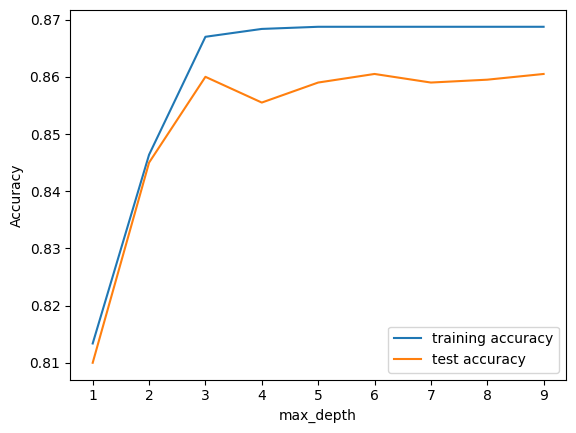

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [ ]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.861
Multi-layer Perceptron : Accuracy on test Data: 0.856

Multi-layer Perceptron : f1_score on training Data: 0.851
Multi-layer Perceptron : f1_score on test Data: 0.851

Multi-layer Perceptron : Recall on training Data: 0.790
Multi-layer Perceptron : Recall on test Data: 0.752

Multi-layer Perceptron : precision on training Data: 0.922
Multi-layer Perceptron : precision on test Data: 0.945


[[969  43]
 [245 743]]
Accuracy:  0.856
Misclassification Rate:  0.144
Recall:  0.7520242914979757
Specificity:  0.9575098814229249
Precision:  0.94529262086514


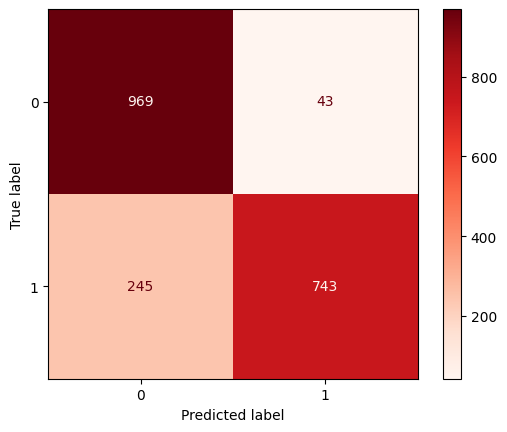

In [ ]:
print(confusion_matrix(y_test, y_test_mlp))
cm = confusion_matrix(y_test, y_test_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = mlp.classes_)
disp.plot(cmap = 'Reds', values_format='');
tn, fp, fn, tp = confusion_matrix(y_test, y_test_mlp).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [ ]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.792,0.752,0.666,0.929
1,K-Nearest Neighbors,0.758,0.766,0.856,0.753
2,Support Vector Machine,0.830,0.797,0.694,0.963
3,Naive Bayes Classifier,0.786,0.725,0.600,0.981
4,Decision Tree,0.858,0.840,0.795,0.933
5,Random Forest,0.860,0.843,0.797,0.932
6,Gradient Boosting Classifier,0.855,0.834,0.781,0.948
7,Multi-layer Perceptron,0.856,0.838,0.790,0.922


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.860,0.843,0.797,0.932
1,Decision Tree,0.858,0.840,0.795,0.933
2,Multi-layer Perceptron,0.856,0.838,0.790,0.922
3,Gradient Boosting Classifier,0.855,0.834,0.781,0.948
4,Support Vector Machine,0.830,0.797,0.694,0.963
5,Logistic Regression,0.792,0.752,0.666,0.929
6,Naive Bayes Classifier,0.786,0.725,0.600,0.981
7,K-Nearest Neighbors,0.758,0.766,0.856,0.753


## Storing Best Model

In [ ]:

# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

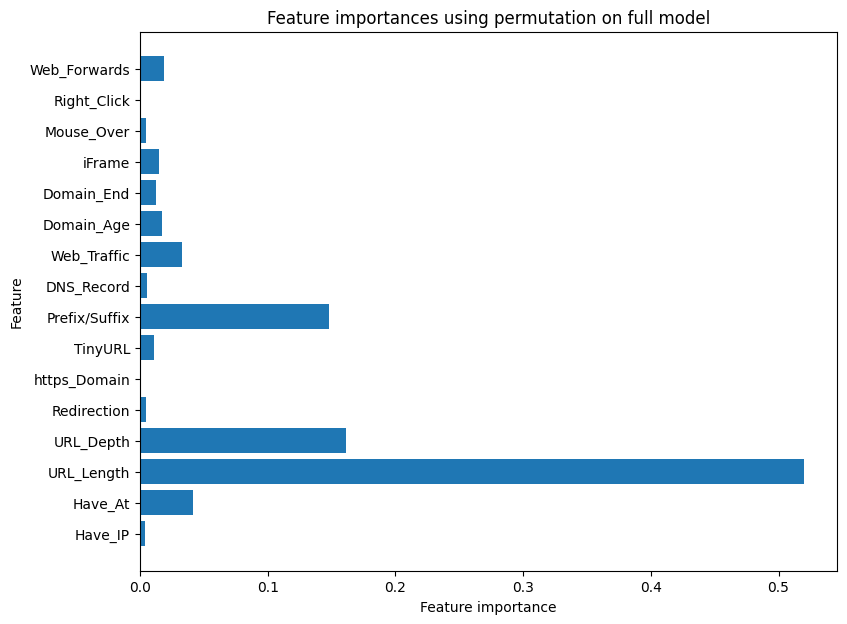

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features.
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "URL_Length", "URL_Depth", "Prefix/Suffix" have more importance to classify URL is phishing URL or not.
4. Random Forest Classifier currectly classify URL upto 86.4% respective classes and hence reduces the chance of malicious attachments.
